Predicted Class: Red


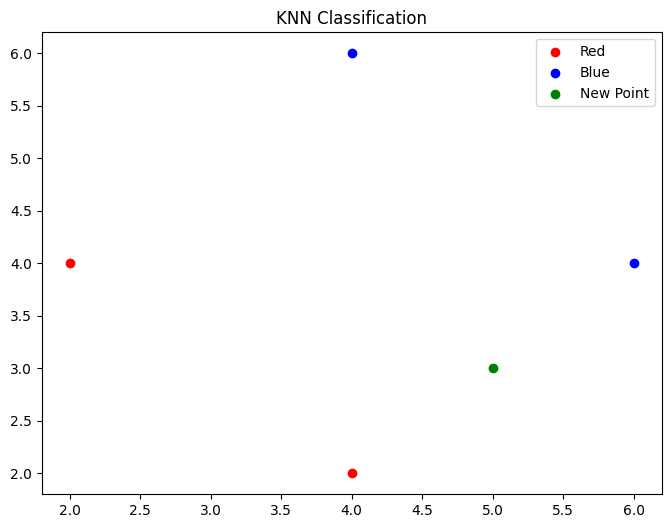

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# Dataset: [x1, x2] with corresponding classes
X = np.array([[2, 4], [4, 2], [4, 6], [6, 4]])  # Feature points
y = np.array(["Red", "Red", "Blue", "Blue"])   # Classes

# New point to classify
new_point = np.array([[5, 3]])

# Train KNN model with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict class
prediction = knn.predict(new_point)
print("Predicted Class:", prediction[0])

# Visualize data
plt.figure(figsize=(8, 6))
for i, point in enumerate(X):
    if y[i] == "Red":
        plt.scatter(point[0], point[1], c='r', label='Red' if i == 0 else None)
    else:
        plt.scatter(point[0], point[1], c='b', label='Blue' if i == 2 else None)
plt.scatter(new_point[0][0], new_point[0][1], c='g', label='New Point')
plt.legend()
plt.title('KNN Classification')
plt.show()

Predicted House Price ($1000s): 196.66666666666666


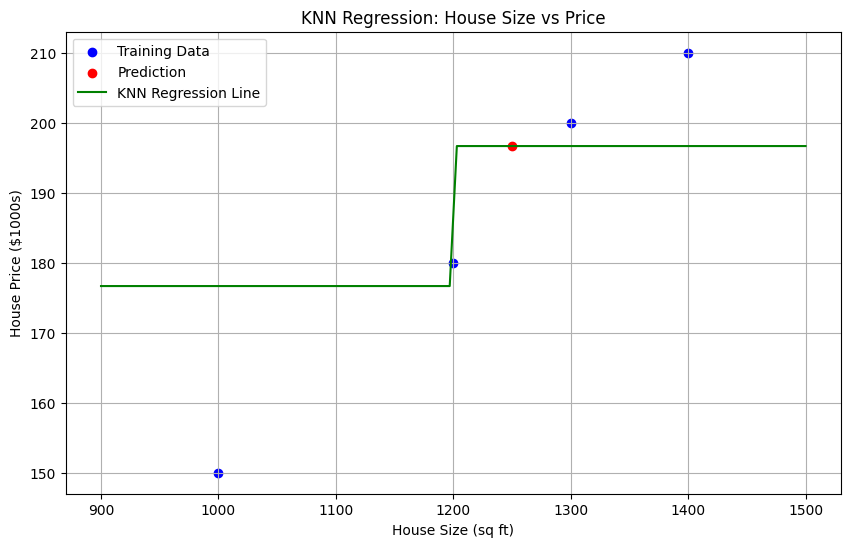

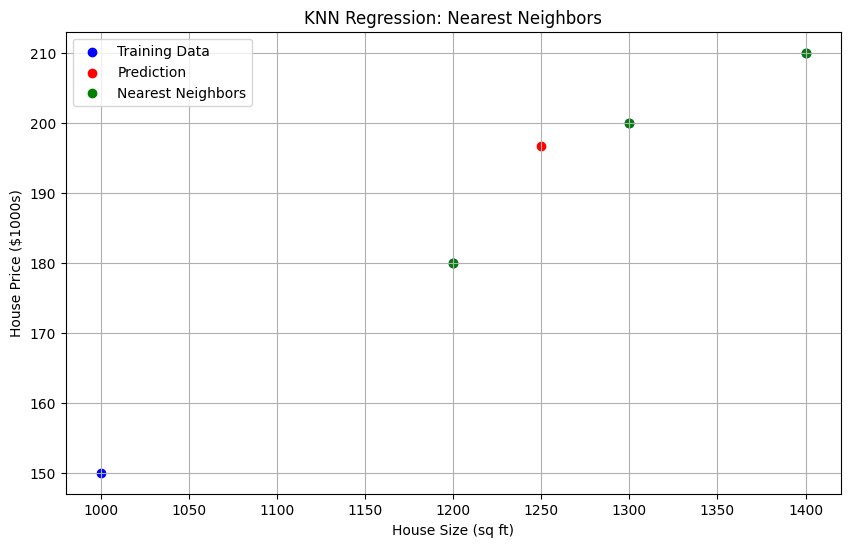

In [112]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1000], [1200], [1300], [1400]])
y = np.array([150, 180, 200, 210])

new_house = np.array([[1250]])

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X, y)

predicted_price = knn_regressor.predict(new_house)
print("Predicted House Price ($1000s):", predicted_price[0])

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(new_house, predicted_price, color='red', label='Prediction')

X_plot = np.linspace(900, 1500, 100).reshape(-1, 1)
y_plot = knn_regressor.predict(X_plot)
plt.plot(X_plot, y_plot, color='green', label='KNN Regression Line')

plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.title('KNN Regression: House Size vs Price')
plt.legend()
plt.grid(True)
plt.show()

distances, indices = knn_regressor.kneighbors(new_house)
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.scatter(new_house, predicted_price, color='red', label='Prediction')
plt.scatter(X[indices[0]], y[indices[0]], color='green', label='Nearest Neighbors')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.title('KNN Regression: Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

Predicted Class: Red


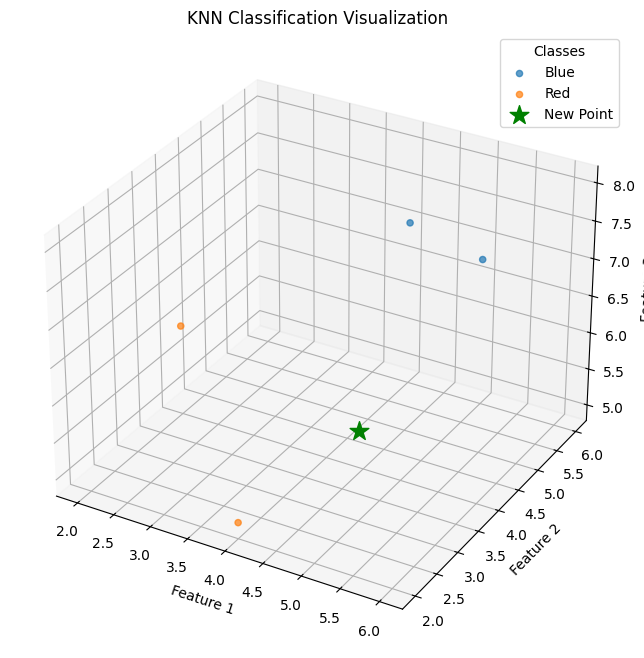

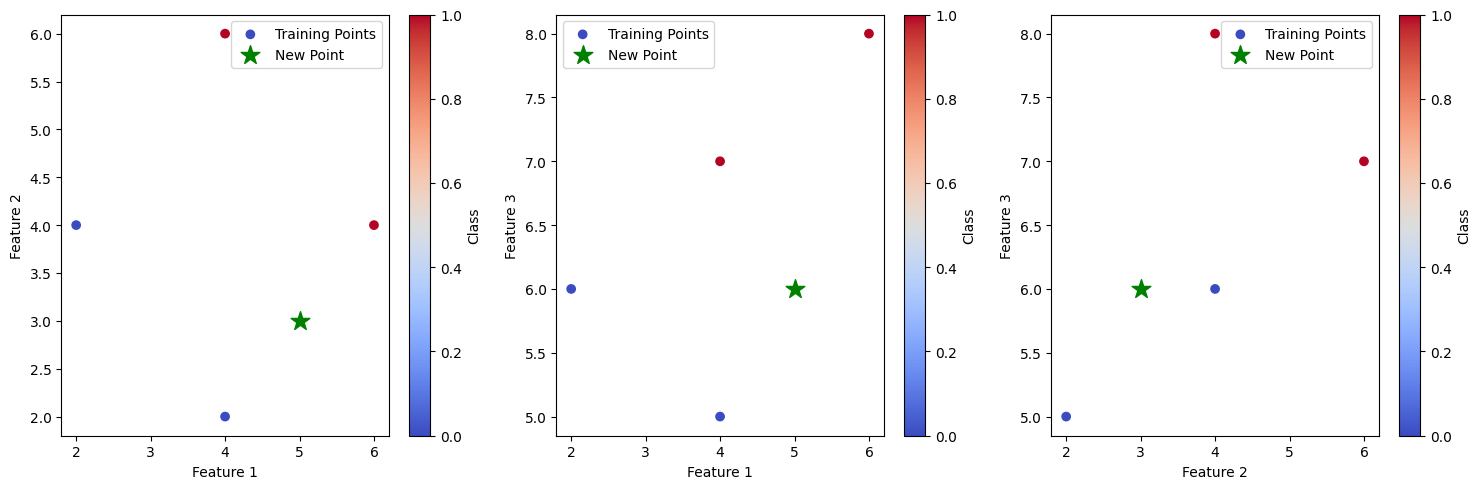

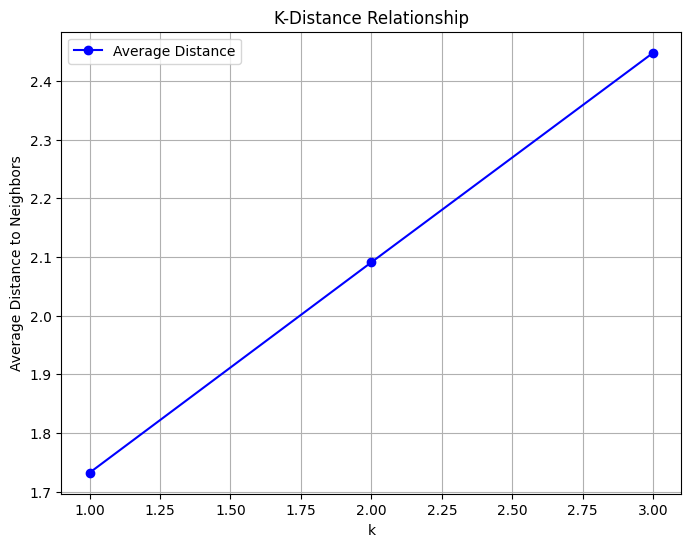

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Example 1: KNN Classification
X_class = np.array([[2, 4, 6], [4, 2, 5], [4, 6, 7], [6, 4, 8]])  # Features
y_class = np.array(["Red", "Red", "Blue", "Blue"])  # Classes
new_point = np.array([[5, 3, 6]])

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_class, y_class)
prediction_class = knn_clf.predict(new_point)
print("Predicted Class:", prediction_class[0])

# Visualize the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot training points
for label in np.unique(y_class):
    mask = y_class == label
    ax.scatter(X_class[mask, 0], X_class[mask, 1], X_class[mask, 2], 
              label=label, alpha=0.7)

# Plot new point
ax.scatter(new_point[0, 0], new_point[0, 1], new_point[0, 2], 
          color='green', marker='*', s=200, label='New Point')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend(title='Classes')
plt.title('KNN Classification Visualization')
plt.show()

# Plot 2D projections
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
feature_pairs = [(0,1), (0,2), (1,2)]

for idx, (i,j) in enumerate(feature_pairs):
    scatter = axes[idx].scatter(X_class[:, i], X_class[:, j], 
                     c=[0 if x == 'Red' else 1 for x in y_class],
                     cmap='coolwarm', label='Training Points')
    axes[idx].scatter(new_point[0, i], new_point[0, j], 
                     color='green', marker='*', s=200, label='New Point')
    axes[idx].set_xlabel(f'Feature {i+1}')
    axes[idx].set_ylabel(f'Feature {j+1}')
    axes[idx].legend()
    plt.colorbar(scatter, ax=axes[idx], label='Class')
plt.tight_layout()
plt.show()

# Plot k-distance relationship
distances = []
k_values = range(1, len(X_class))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_class, y_class)
    distances.append(knn.kneighbors(new_point)[0][0].mean())

plt.figure(figsize=(8, 6))
plt.plot(k_values, distances, 'bo-', label='Average Distance')
plt.xlabel('k')
plt.ylabel('Average Distance to Neighbors')
plt.title('K-Distance Relationship')
plt.grid(True)
plt.legend()
plt.show()


Predicted House Price ($1000s): 196.66666666666666


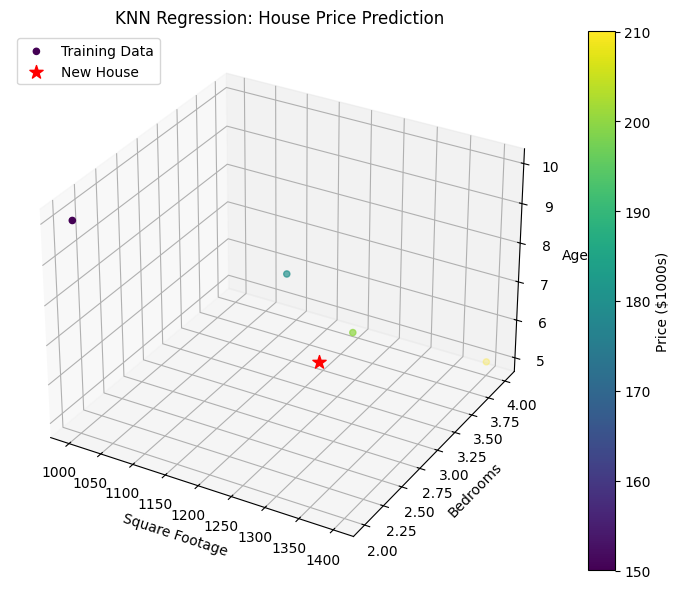

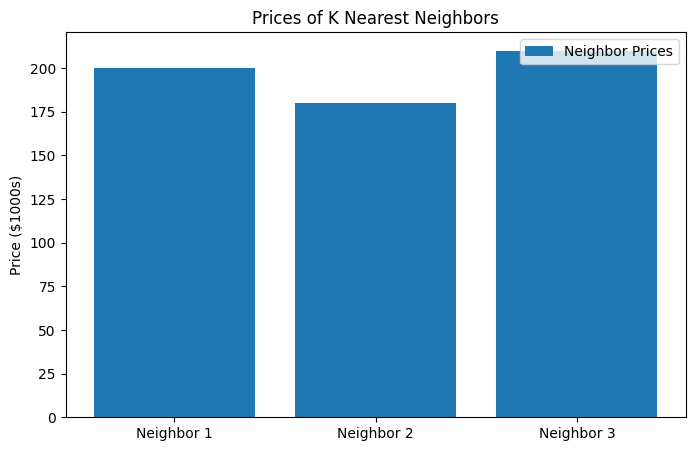

In [114]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example 2: KNN Regression
X_reg = np.array([[1000, 2, 10], [1200, 3, 8], [1300, 3, 7], [1400, 4, 5]])  # Features
y_reg = np.array([150, 180, 200, 210])  # Prices
new_house = np.array([[1250, 3, 6]])

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_reg, y_reg)
predicted_price = knn_reg.predict(new_house)
print("Predicted House Price ($1000s):", predicted_price[0])

# Create 3D visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
scatter = ax.scatter(X_reg[:, 0], X_reg[:, 1], X_reg[:, 2], c=y_reg, cmap='viridis', label='Training Data')
new_point = ax.scatter(new_house[0, 0], new_house[0, 1], new_house[0, 2], color='red', s=100, marker='*', label='New House')

# Add labels and title
ax.set_xlabel('Square Footage')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Age')
plt.colorbar(scatter, label='Price ($1000s)')
plt.title('KNN Regression: House Price Prediction')
ax.legend(loc='upper left')
# Plot feature importance
plt.figure(figsize=(8, 5))
distances = knn_reg.kneighbors(new_house)[0][0]
neighbors = knn_reg.kneighbors(new_house)[1][0]
bars = plt.bar(['Neighbor 1', 'Neighbor 2', 'Neighbor 3'], y_reg[neighbors], label='Neighbor Prices')
plt.title('Prices of K Nearest Neighbors')
plt.ylabel('Price ($1000s)')
plt.legend(loc='upper right')
plt.show()

[1 3 2 4]
[[2 3 3 3]]
Predicted Species: Iris-setosa

Closest Matching Data Point:
    sepal_length  sepal_width  petal_length  petal_width          species
57           4.9          2.4           3.3          1.0  Iris-versicolor


c:\Users\DHUSNIC INFANT DM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


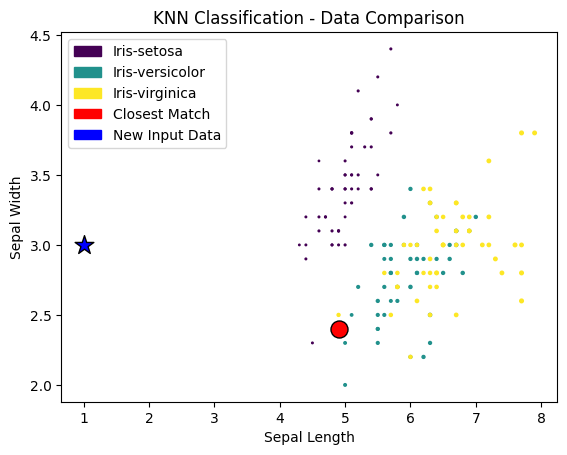

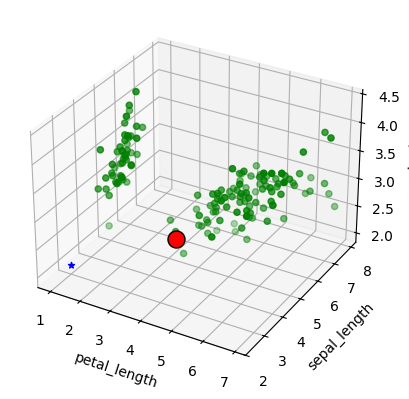

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [115]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Load the dataset
df = pd.read_csv(r'D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\IRIS.csv')

# Convert categorical labels to numeric values
df['species_encoded'] = pd.Categorical(df['species']).codes

randomIntArray2=np.random.randint(1,5,size=(1,4))
# Input data for prediction
input_data = np.random.randint(2, 4, size=(1, 4))  # New data point
print(randomIntArray2[0])
print(input_data)
input_data = randomIntArray2[0]
# Create and train the KNN model
model = KNeighborsClassifier(n_neighbors=6)  # Use k=1 to find the closest neighbor
model.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])

# Make a prediction
prediction = model.predict([input_data])
print(f"Predicted Species: {prediction[0]}")

# Find the closest match in the dataset
df['distance'] = np.linalg.norm(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values - input_data, axis=1)
closest_match = df.nsmallest(1, 'distance')

print("\nClosest Matching Data Point:")
print(closest_match[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']])

# Scatter plot with numeric color encoding
scatter = plt.scatter(df['sepal_length'], df['sepal_width'],df['petal_length'], c=df['species_encoded'], cmap='viridis')

# Highlight the closest existing data point
plt.scatter(closest_match['sepal_length'], closest_match['sepal_width'], color='red', edgecolors='black', s=150, label="Closest Match")

# Highlight the input data point
plt.scatter(input_data[0], input_data[1], color='blue', edgecolors='black', s=200, marker='*', label="New Input Data")

# Create a legend mapping species names to colors
species_names = df['species'].unique()
legend_patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=species) for i, species in enumerate(species_names)]

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Classification - Data Comparison')

# Add legend to the plot
plt.legend(handles=legend_patches + [mpatches.Patch(color='red', label="Closest Match"), mpatches.Patch(color='blue', label="New Input Data")])

# Add color bar for reference
# plt.colorbar(label="Species Encoding")

# Show plot
plt.show()


fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['petal_length'],df['sepal_length'],df['sepal_width'],color='green')
ax.scatter(closest_match['sepal_length'], closest_match['sepal_width'],closest_match['petal_length'], color='red', edgecolors='black', s=150, label="Closest Match")
ax.scatter(input_data[0],input_data[1],input_data[2],color='blue',marker="*")
ax.set_xlabel("petal_length")
ax.set_ylabel('sepal_length')
ax.set_zlabel('sepal_width')
plt.show()

b=['sepal_length','sepal_width','petal_length','petal_width']
a=df[b].mean()
print(a)